# Final Proposal: The Effects of Subsidence on Houston, Texas

#### Principal Investigator: Ava Ring
#### Email: aring@nyu.edu

This project will examine the compaction of land in the Houston, Texas area. A recent hurricane, Hurricane Harvey, devestated the area and highlighted the fact that most of Houston is below sea level and prone to flooding. This peaked my interest and led me to ask, is Houston sinking?

There are many reasons parts of the earth's surface will sink, but the most prevelant is *subsidence*. "Land subsidence is a gradual settling or sudden sinking of the Earth's surface owing to subsurface movement of earth materials." In most cases, subsidence is caused from the extraction of water for drinking or agricultural purposes from layers of rock. When the water is extracted, it causes the layers to smash together, compact, and then sink. Subsidence occurs most frequently in dry, arid places where extracting water from aquifers is a necessity. Besides Texas, Nevada and California also contain large subsidence bowls More information on subsidence can be found [here](https://water.usgs.gov/ogw/subsidence.html). 

Let me give you an illustrative example of subsidence. In the 1950s, a group of oil tycoons moved to an area south east of Houston city center, which they titled "Oil Bay." With the new residents came increased development of the land and increased extraction of water from a nearby aquifer. Because Houston is already below sea-level and so flat, when a major hurricane hit (Alicia) the whole town was under water. It had sunk over 30 feet in a few decades. 

Houston is the largest subsidence bowl in the United States, and the first to be studied. After Oil Bay, Harris-County created Harris-Galveston Subsidence District (HGSD) in 1975. "The District was created to provide for the regulation of groundwater withdrawal throughout Harris and Galveston counties for the purpose of preventing land subsidence, which leads to increased [flooding][1]."

This project will examine the positive effects Harris-Galveston Subsidence District (HGDS) has had on subsidence and land compaction in Houston. It will show how water extraction from aquifers leads to land subsindence. It will demonstrate how subsidence has decreased since HGDS's founding and regulations have taken place. 

Vocababulary to know:  
- aquifer - a body of permeable rock that can contain or transmit groundwater.
- borehole extensometer - measurement tool used to determine the movement behavior of soil and rock masses


[1]: https://hgsubsidence.org/about-the-district/ 

* * *

### Data Report 

Land compaction was recorded using 13 extensometers near the Chicot and Evangeline aquifers in the Houston area. The extensometer sites were establed from 1973 to 1980. Measurements of compaction are recorded about 13 times a year until 2015. 

The data can be found at [USGS.gov](https://pubs.usgs.gov/sim/3365/tables/). 

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


%matplotlib inline

- pandas is used to make the dataframes of extensometer data.
- matplotlib.pyplot is used to plot the data.
- numpy is used for manipulation of the data.
- matplotlib.dates is for putting datetime series data on the graph's x axis.
- mpl_toolkits.axes_grid1.inset_locator is needed for a graph inset.

### Step One: Reading in the Data

In [61]:
usgs = 'https://pubs.usgs.gov/sim/3365/tables/' 

# this is where you can find the most recent subsidence data

data_list = ["sim3365_table4A.xlsx", "sim3365_table4B.xlsx", "sim3365_table4C.xlsx",
             "sim3365_table4D.xlsx", "sim3365_table4E.xlsx", "sim3365_table4F.xlsx",
             "sim3365_table4G.xlsx", "sim3365_table4H.xlsx", "sim3365_table4I.xlsx",
             "sim3365_table4J.xlsx", "sim3365_table4K.xlsx", "sim3365_table4L.xlsx",
             "sim3365_table4M.xlsx"]

# here are the 13 tables of measured cumulative compaction of subsurface sediments.

data_list[3]

'sim3365_table4D.xlsx'

In [62]:
# combining the path to the website and the specific tables' urls to make a readable url string

urls = [(usgs + item) for item in data_list]

urls

['https://pubs.usgs.gov/sim/3365/tables/sim3365_table4A.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4B.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4C.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4D.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4E.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4F.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4G.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4H.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4I.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4J.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4K.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4L.xlsx',
 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4M.xlsx']

Now we are reading in the excel sheets. 

In [63]:
# I use list comprehension for each of the urls in list called"urls"

# some cleaning takes place. 
# the first three rows are text explaining where the extensometer is, so I skip those.
# the last two rows give net decrease in  land-surface elevation, but I skip this too. 
# lastly, two columns on the excel sheet are just blank, so I parse them out.

list_of_dfs = [pd.read_excel # reading all dfs in
               (item,skiprows = [0, 1, 2], # skipping their uneeded title rows
                skip_footer = 2, # skipping their footer too
                parse_cols=[0,2]) # slicing only data columns
               for item in urls] 

list_of_dfs[0].head() # seeing how it looks

,Measurement date,Compaction (feet)
0,1980-07-22,0.000
1,1980-08-19,0.008
2,1980-09-16,0.014
3,1980-10-14,0.002
4,1980-11-10,0.025


In [64]:
# we still need to fix the column names so they are easier to work with. 
# lukily, all the dataframes are structured the same way, so a for loop fixes all tables.
# I also set the index to the Measurement date since this is a time series dataframe.

for df in list_of_dfs:
    df.columns = ["Measurement_date", "Compaction"]
    
    df.set_index("Measurement_date", inplace = True)
    
list_of_dfs[6].head()

,Compaction
Measurement_date,
1973-07-13 00:00:00,0.000
1973-08-13 00:00:00,0.007
1973-09-13 00:00:00,0.005
1973-10-11 00:00:00,0.010
1973-11-08 00:00:00,0.012


In [65]:
# now I name the 13 dataframes according to their location. 
# I set a string name for them as well so that I can easily identify each one later on.

lake_houston = list_of_dfs[0] #tableA
lake_houston.name = "lake_houston"

northeast = list_of_dfs[1] #tableB
northeast.name = "northeast"
    
southwest = list_of_dfs[2] #tableC
southwest.name = "southwest"
    
east_end = list_of_dfs[3] #tableD
east_end.name = "east_end"

addicks = list_of_dfs[4] #tableE
addicks.name = "addicks"

johnson_space = list_of_dfs[5] #tableF
johnson_space.name = "johnson_space"

texas_city = list_of_dfs[6] #tableG
texas_city.name = "texas_city"

baytown_shallow = list_of_dfs[7] #tableH
baytown_shallow.name = "baytown_shallow"

baytown_deep = list_of_dfs[8] #tableI
baytown_deep.name = "baytown_deep"
    
seabrook = list_of_dfs[9] #tableJ
seabrook.name = "seabrook"

clear_lake_shallow = list_of_dfs[10] #tableK 
clear_lake_shallow.name = "clear_lake_shallow"

clear_lake_deep = list_of_dfs[11] #tableL
clear_lake_deep.name = "clear_lake_deep"

pasadena = list_of_dfs[12] #tableM
pasadena.name = "pasadena"

Let's take a look at them all.

In [66]:
alldfs_list = [lake_houston, northeast, southwest, east_end, addicks, 
               johnson_space, texas_city, baytown_shallow, baytown_deep, 
               seabrook, clear_lake_shallow, clear_lake_deep, pasadena]

for df in alldfs_list: 
    print(df.name)
    print(df.head())
    
    print("\n")

lake_houston
                  Compaction
Measurement_date            
1980-07-22             0.000
1980-08-19             0.008
1980-09-16             0.014
1980-10-14             0.002
1980-11-10             0.025


northeast
                  Compaction
Measurement_date            
1980-06-24             0.000
1980-07-22             0.007
1980-08-19             0.017
1980-09-05             0.020
1980-10-14             0.033


southwest
                  Compaction
Measurement_date            
1980-06-17             0.000
1980-06-24             0.003
1980-07-23             0.037
1980-07-30             0.045
1980-08-19             0.057


east_end
                  Compaction
Measurement_date            
1973-07-20             0.000
1973-07-25             0.002
1973-08-13             0.003
1973-09-04             0.016
1973-09-06             0.014


addicks
                  Compaction
Measurement_date            
1974-07-11             0.000
1974-07-24             0.004
1974-08-30    

* * *

#### Problem with Data
The dataframes look pretty good now, with a few exceptions.

#### Texas City 
This dataframe has a different index that consists of strings and not DateTime Index. I have to look further into this because if I want to use a function on it, the index has to be in DateTimeIndex form.

#### Different Start Dates 
For all of the dataframes (besides Johnson Space), the data starts at 0 when the first measurement of subsidence was taken. Then, it measures the compaction in feet relative to that start point. 

The problem is that the first measurement was taken at different years for some of the sites. For example, Lake Houston subsidence measures start in 1980, while Addicks data starts in 1973. So if I compare Lake Houston subsidence vs Addicks subsidense in 2015, it will seem like Addicks has sunk significantly more compared to the other sites. However, it will only seem this way because Addicks data includes 7 additional years of measurements. 

The dataframes i have to change are southwest, east_end, addicks, johnson_space, texas_city, baytown_shallow, baytown_deep, seabrook, clear_lake_shallow, clear_lake_deep and pasadena.

#### Johnson Space 
Johnson Space dataframe is also a bit strange because it does not start with a measurement of 0, but of 1.347. I will rework this dataframe so it starts with 0 and goes from there, so it is consistent with the other sites. 

### Step 2: Fix Texas City 

In [67]:
texas_city.head()

,Compaction
Measurement_date,
1973-07-13 00:00:00,0.000
1973-08-13 00:00:00,0.007
1973-09-13 00:00:00,0.005
1973-10-11 00:00:00,0.010
1973-11-08 00:00:00,0.012


Texas City has the time, which is a red flag. The index type is below. 

In [68]:
print(type(texas_city.index))

print(type(addicks.index))

# this shows that the index is not right. 
# I need a datetime index for texas_city, like for example addicks.

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


so i read in the data again so that I can fix the problem from the beginning.

In [69]:
texasurl = 'https://pubs.usgs.gov/sim/3365/tables/sim3365_table4G.xlsx'

new_texas_city = pd.read_excel(texasurl,skiprows = [0, 1, 2], skip_footer = 2, parse_cols=[0,2])

In [70]:
new_texas_city.tail(10)

,Measurement date,Compaction (feet)
542,2015-03-30 00:00:00,0.097
543,2015-04-29 00:00:00,0.096
544,2015-05-19 00:00:00,0.097
545,2015-06-22 00:00:00,0.097
546,7/23/201,0.099
547,2015-09-08 00:00:00,0.100
548,2015-09-29 00:00:00,0.096
549,2015-10-28 00:00:00,0.097
550,2015-11-23 00:00:00,0.096
551,2015-12-21 00:00:00,0.095


Here you can see row 546 was a typo. Therefore, we have to change that entry to a date. In the data, "7/21/201" instead of "7/21/2015." This is why the column "Measurement date" was considered a string object, and not a datetime series.

In [71]:
new_texas_city.columns = ["Measurement_date", "Compaction"] 

# I change the name of the columns so they are easier to work with

new_texas_city.loc[546, "Measurement_date"] = "2015-07-23 00:00:00"

# then I change row 546 to the correct date

new_texas_city.tail(10)

,Measurement_date,Compaction
542,2015-03-30 00:00:00,0.097
543,2015-04-29 00:00:00,0.096
544,2015-05-19 00:00:00,0.097
545,2015-06-22 00:00:00,0.097
546,2015-07-23 00:00:00,0.099
547,2015-09-08 00:00:00,0.100
548,2015-09-29 00:00:00,0.096
549,2015-10-28 00:00:00,0.097
550,2015-11-23 00:00:00,0.096
551,2015-12-21 00:00:00,0.095


In [72]:
# now I can convert the column "Measurement_date" to a DateTime form, instead of a string form.

new_texas_city["Measurement_date"] = pd.to_datetime(new_texas_city["Measurement_date"])

In [73]:
# Then I set the index to this column and set it inplace True.

new_texas_city.set_index("Measurement_date", inplace = True)

texas_city = new_texas_city

print(texas_city.head())

print(type(texas_city.index))

                  Compaction
Measurement_date            
1973-07-13             0.000
1973-08-13             0.007
1973-09-13             0.005
1973-10-11             0.010
1973-11-08             0.012
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


### Step 3: Fix Different Start Dates

First, I truncate the dataframes to start at July 1980. 

In [74]:
# I create a function I can apply on each of the dataframes. 
# This function tells it to drop any entries with DateTimeIndexes before July, 1980.

def dropyears(df_):
    return(df_.truncate(before = "1980-7"))  

In [75]:
southwest = southwest.apply(dropyears)

east_end = east_end.apply(dropyears)

addicks = addicks.apply(dropyears)

johnson_space = johnson_space.apply(dropyears)

texas_city = texas_city.apply(dropyears)

baytown_shallow = baytown_shallow.apply(dropyears)

baytown_deep = baytown_deep.apply(dropyears)

seabrook = seabrook.apply(dropyears)

clear_lake_shallow = clear_lake_shallow.apply(dropyears)

clear_lake_deep = clear_lake_deep.apply(dropyears)

pasadena = pasadena.apply(dropyears)

In [76]:
# test to double check the function worked correctly.

addicks.head()

,Compaction
Measurement_date,
1980-07-23,0.672
1980-08-19,0.690
1980-09-16,0.714
1980-10-14,0.735
1980-11-10,0.745


Next, I create a "diff_" column that takes the difference in subsidence between each measurement day.

In [77]:
list_to_change = [southwest, east_end, addicks, 
                  johnson_space, texas_city, baytown_shallow, baytown_deep, 
                  seabrook, clear_lake_shallow, clear_lake_deep, pasadena]

In [78]:
# Im using the diff method to find the difference between each row of Compaction

for df in list_to_change:
    df["diff_"] = df.Compaction.diff()
    
    df.fillna(0, inplace = True)
    
addicks.head()

,Compaction,diff_
Measurement_date,,
1980-07-23,0.672,0.000
1980-08-19,0.690,0.018
1980-09-16,0.714,0.024
1980-10-14,0.735,0.021
1980-11-10,0.745,0.010


But I need to take the sum of the previous row of diff_ column and the current diff column. This operation will give me the actual Compaction for each time period.

In [79]:
# I use the "cumsum" method on the "diff_" column to achieve my want.

for df in list_to_change: 
    df["cumsum_"] = df.diff_.cumsum()
    
addicks.head() # to see the cumsum_ column.

,Compaction,diff_,cumsum_
Measurement_date,,,
1980-07-23,0.672,0.000,0.000
1980-08-19,0.690,0.018,0.018
1980-09-16,0.714,0.024,0.042
1980-10-14,0.735,0.021,0.063
1980-11-10,0.745,0.010,0.073


In [80]:
# drop the uncessary columns from the dataframes

for df in list_to_change:
    df.drop("Compaction", axis = 1, inplace = True)
    
    df.drop("diff_", axis = 1, inplace = True)
    
addicks.head() # to see the dropped columns

,cumsum_
Measurement_date,
1980-07-23,0.000
1980-08-19,0.018
1980-09-16,0.042
1980-10-14,0.063
1980-11-10,0.073


In [81]:
# rename cumsum_ to "Compaction"

for df in list_to_change: 
    df.columns = ["Compaction"]
    
addicks.head() # to see the final product

,Compaction
Measurement_date,
1980-07-23,0.000
1980-08-19,0.018
1980-09-16,0.042
1980-10-14,0.063
1980-11-10,0.073


In [82]:
# check to see if all of the dfs now start in July of 1980. 

alldfs_list = [lake_houston, northeast, southwest, east_end, addicks, 
               johnson_space, texas_city, baytown_shallow, baytown_deep, 
               seabrook, clear_lake_shallow, clear_lake_deep, pasadena]

for df in alldfs_list: 
    print(df.head())
    
    print("\n")

                  Compaction
Measurement_date            
1980-07-22             0.000
1980-08-19             0.008
1980-09-16             0.014
1980-10-14             0.002
1980-11-10             0.025


                  Compaction
Measurement_date            
1980-06-24             0.000
1980-07-22             0.007
1980-08-19             0.017
1980-09-05             0.020
1980-10-14             0.033


                  Compaction
Measurement_date            
1980-07-23             0.000
1980-07-30             0.008
1980-08-19             0.020
1980-09-16             0.046
1980-10-14             0.066


                  Compaction
Measurement_date            
1980-07-22             0.000
1980-08-19             0.007
1980-09-15             0.011
1980-10-15             0.014
1980-11-10             0.021


                  Compaction
Measurement_date            
1980-07-23             0.000
1980-08-19             0.018
1980-09-16             0.042
1980-10-14             0.063
1980-1

In [83]:
len(addicks.Compaction)

456

To look at the final compaction of every site, I print the last row of each dataframe.

Texas City and Johnson Space land has elevated in the past 40 years. The rest of the locations have sunk anywhere from .6 to 3 inches.

In [84]:
for df in alldfs_list: 
    print(df.tail(1))

                  Compaction
Measurement_date            
2015-12-28             0.608
                  Compaction
Measurement_date            
2015-12-23             0.905
                  Compaction
Measurement_date            
2015-12-23             1.627
                  Compaction
Measurement_date            
2015-12-23             0.514
                  Compaction
Measurement_date            
2015-12-23             2.994
                  Compaction
Measurement_date            
2015-12-21            -1.215
                  Compaction
Measurement_date            
2015-12-21            -0.087
                  Compaction
Measurement_date            
2015-12-28             0.508
                  Compaction
Measurement_date            
2015-12-28             0.263
                  Compaction
Measurement_date            
2015-12-21             0.421
                  Compaction
Measurement_date            
2015-12-21             0.445
                  Compaction
Measurement_da

### Step 4: Plotting the Data

I want to see all of the trends of compaction at the different extensometer sites throughout Houston. Below I will plot all 13 sites.

I had to get a little creative here. An uneven amont of dataframes made sub-plotting difficult. For a work-around, I made up a fake dataframe with the same index as the other dataframes. I use the fake datafram (nonedf) as a filler for subplots 153, and 353.

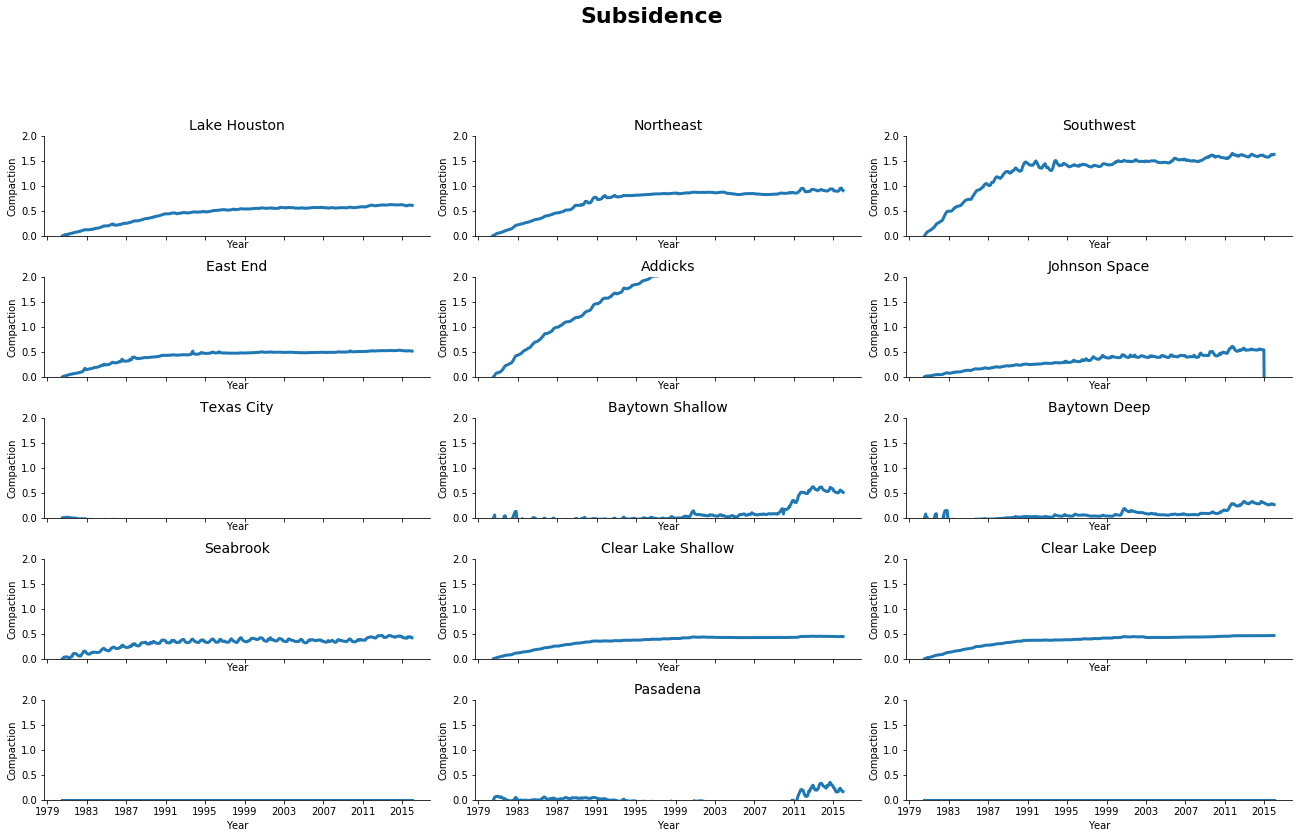

In [85]:
########################## my work around ###########################

nonedf = pasadena.copy() # this is me making a placeholder dataframe 

nonedf["Compaction_"] = np.nan # I fill it with NaN values 

nonedf.Compaction_.fillna(0, inplace = True) # then fill the NaN with 0s

nonedf.drop("Compaction", axis = 1, inplace = True) # drop the initial column

nonedf.columns = ["Compaction"] # and rename the NaN column to Compaction

########################################################################

fig, ax = plt.subplots(nrows = 5, ncols = 3, sharex = True, figsize = (18,10))


ax = ax.ravel() # this lets me use a for loop on all of the dfs.

var_list = [lake_houston, northeast, southwest, east_end, addicks, 
            johnson_space, texas_city, baytown_shallow, baytown_deep, 
            seabrook, clear_lake_shallow, clear_lake_deep, nonedf, pasadena, nonedf]

# above are my dataframes.

nice_name = ["Lake Houston", "Northeast", "Southwest", "East End", "Addicks",
             "Johnson Space", "Texas City", "Baytown Shallow", "Baytown Deep", 
             "Seabrook", "Clear Lake Shallow", "Clear Lake Deep", " ", "Pasadena", " "]

# this list I will use to name all of the charts.

################################################################################

count = 0

for xxx in ax:
    xxx.plot(var_list[count].Compaction, linewidth = 3.0)
    
    xxx.set_title(nice_name[count], fontsize = 14)
    
    xxx.spines["right"].set_visible(False) # remove the top spines
    
    xxx.spines["top"].set_visible(False) # remove the right spines
    
    xxx.set_xlabel("Year", fontsize = 10) # set the x label to Year
    
    xxx.set_ylabel("Compaction", fontsize = 10) # set the Y label to Compaction
    
    xxx.set_ylim(0.0, 2.0) # set the y axis limits 
    
    count = count + 1 # update the count 
    
#####################################################################

fig.suptitle("Subsidence", fontsize = 22, fontweight = "bold", y = 1.15)

# above formats the title and adds an extra spacing between the title and graphs

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# above makes the graphs fit nicely.

* * *

### Step 5: Interprutting the Data

This data provided by USGS highlights many interesting points about subsidence and regulation. 

**Effects of Water Extraction on Subsidence**
- Seabrook supports the fact that water extraction leads to subsidence.

**Effect of HGSD regulation**
- HGSD regulation takes effect in 1990. Since then less water is being extracted from aquifers and therefore less subsidence occurs. 

- The Addicks site is a perfect example of how well regulation of water extraction diminishes sinking since HGSD regulation takes place much later than the other sites. 

I will use additional graphs to shine further light on these points.

#### Seabrook

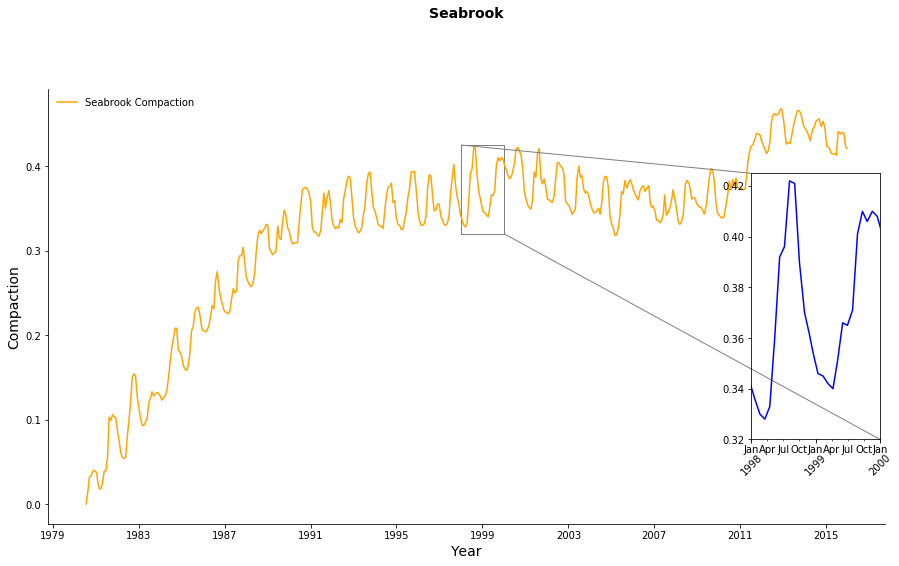

In [86]:
fig, ax = plt.subplots(figsize = (15,8)) # creating the ax

ax.plot(seabrook.Compaction, color = "orange") # plotting seabrook data 

############# creating inset #################################

axins = zoomed_inset_axes(ax, 3.0, loc=7) 

# above creates an axis on top of the original ax, 
# tells it how much to zoom in (3.0)
# and tells it what position to be in (center right)

axins.plot(seabrook["Compaction"], color = "b")

# above plots the seabrook data inside the inset

x1, x2, y1, y2 = "1998", "2000", 0.32, .425
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y - limits 
# this sets the limits for what to show in the inset


from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

############### formatting ###################################

ax.set_title("Seabrook", fontsize = 14, fontweight = "bold", y = 1.15) 
ax.set_ylabel("Compaction", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,)
# adding the title, and x and y labels

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# making the spines invisible

ax.legend(["Seabrook Compaction"],frameon=False)
# creating the legend

############# inset axis ####################################
years = mdates.YearLocator() # grabbing the Year   
months = mdates.MonthLocator(range(1, 13), 
                             bymonthday=1, interval=3)
# grabbing every three months 
yearsFmt = mdates.DateFormatter('%Y') # formatting the Year
mthsFmt = mdates.DateFormatter('%b') # formatting the month

axins.xaxis.set_major_locator(years) 
axins.xaxis.set_minor_locator(months)
axins.xaxis.set_major_formatter(yearsFmt)
axins.xaxis.set_minor_formatter(mthsFmt)

plt.setp(axins.xaxis.get_majorticklabels(), 
         rotation=45, y = -.02)


plt.show()

The above graph demonstrates seasonal subsidence. In the hot and dry months of the year (May to September) more water is extracted from the aquifer near this site. This leads to drier earth and more compaction. Whenever it is wetter and less water is being taken, the land rebounds and elevates. This pattern can be seen every year. 

However, since HGDS regulation has gone into place, compaction has continued at a decreasing rate. 

#### Decreasing rate of compaction

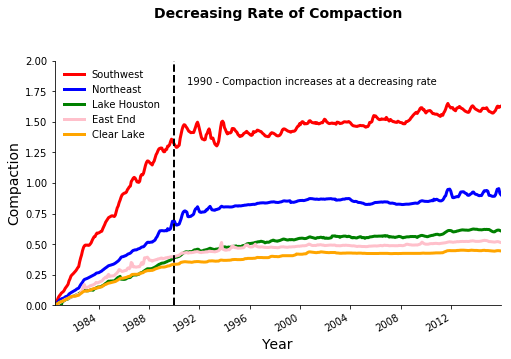

In [87]:
fig, ax = plt.subplots(figsize = (8,5)) 

southwest.Compaction.plot(ax = ax, linewidth = 3.0, color = "r")
northeast.Compaction.plot(ax = ax, linewidth = 3.0, color = "b")
lake_houston.Compaction.plot(ax = ax, linewidth = 3.0, color = "g")
east_end.Compaction.plot(ax = ax, linewidth = 3.0, color = "pink")
clear_lake_shallow.Compaction.plot(ax = ax, linewidth = 3.0, color = "orange")

ax.set_title("Decreasing Rate of Compaction", fontsize = 14, fontweight = "bold", y = 1.15) 
ax.set_ylabel("Compaction", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,)

ax.legend(["Southwest", "Northeast", "Lake Houston", "East End", "Clear Lake"],
          frameon=False) 

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylim(0.00, 2.00)

# below I make the line for 1990

ax.axvline(x= "1990", 
           color='k',  
           linestyle='--', 
           linewidth=2)

message = "1990 - Compaction increases at a decreasing rate"

ax.text("1991", 1.8, message, horizontalalignment='left', fontweight = 1.5)

plt.show()

The data on most sites show that the slopes of the graphs, the rate of compaction, was increasing at a faster rate in the 1980s and has shallowed out since the early 1990s. While subsidence has increased, it is not increasing at a decreasing rate. This can mostly be attributed to the founding of Harris-Galveston Subsidence District (HGSD) in 1975. 

HGSD regulated the amount of water that could be extracted from the aquifers in the Harris-Galveston area. We can see a direct effect on when those regulations took place and the rates of compaction progressively decreasing. 

A depiction of this phenomenon is provided above.  

### Addicks


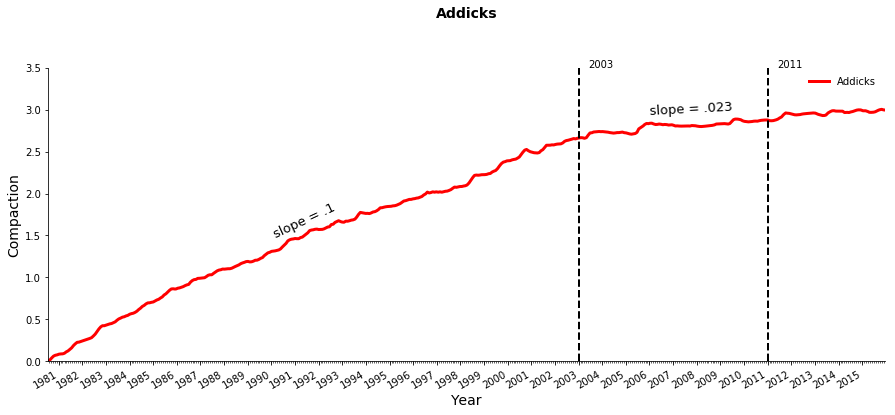

In [88]:
fig, ax = plt.subplots(figsize = (15,6))

addicks.Compaction.plot(ax = ax, 
                        linewidth = 3.0, color = "r")

########## formatting ########################
ax.set_title("Addicks", fontsize = 14, fontweight = "bold", y = 1.15) 
ax.set_ylabel("Compaction", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,)

ax.legend(["Addicks"],frameon=False) 

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylim(0.00, 3.50)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)


ax.axvline(x= "2003", 
           color='k',  
           linestyle='--', 
           linewidth=2)

ax.axvline(x= "2011", 
           color='k',  
           linestyle='--', 
           linewidth=2)

message2003 = "2003"
message2011 = "2011"

ax.text("2003-6", 3.5, message2003, horizontalalignment='left', fontweight = 2.0)
ax.text("2011-6", 3.5, message2011, horizontalalignment='left', fontweight = 2.0)

first_slope = "slope = .1"
plt.text("1990", 1.8, first_slope, fontsize = 13, rotation = 25)

second_slope = "slope = .023"
plt.text("2006", 3, second_slope, fontsize = 13, rotation = 3)

plt.show()

To further prove the positive effect of HGDS regulation, take a look at Addicks. 

The addicks extensometer happens to be located in a area where HGDS regulation did not apply until 2011. Therefore, Addicks generally experienced higher levels of compaction than any other site from 1980 forward. 

We can clearly see that compaction remained steady from 1980 to 2003, with about .1 feet of the earth compacting each measurement. In 2003, the USGS personnel deemed the adjacent well-supply where water was being pulled from as being inoperative. This curtailed the sinking of the land area. In 2011, the regulation went into effect.

* * *

### Summary 

Houston struggles from land subsidence because of it's arid and dry weather as well as its palcement below sea level. However, deep land water extraction from aquifers exasterbates this problem. This can be seen in the seasonal water extraction at Seabrook. HGDS's regulation has helped curtail the compaction of Houston since it's inception in 1975. 

One long term solution to this problem is for residents and devlopments to get their water from surface supplies, instead of the ground. Natural resources like surrounding lakes and rivers should be utilized. However, this option is a more costly way of getting water. 

Unless we want another Oil Bay on our hands, Houstonians should be aware of the effects of subsidence on the land they live on and the organizations helping to protect them. 